In [1]:
import pandas as pd
import numpy as np

# data 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
import graphviz

# Scale 변환
from sklearn.preprocessing import StandardScaler

# data split
from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


## Data 확인 및 전처리

In [2]:
df_raw = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/HMEQ.csv', encoding = 'euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [5]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
# Data Split
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]

random = 1234

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = random)

print("Split 전 data size : {0}".format(df_raw_x.shape))
print("Split 후 train data size : {0}".format(df_train_x.shape))
print("Split 후 test data size : {0}".format(df_test_x.shape))

Split 전 data size : (3748, 18)
Split 후 train data size : (2623, 18)
Split 후 test data size : (1125, 18)


In [7]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

KNeighborsClassifier()

In [8]:
# train 정확도
print("Accuracy on train set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
# test 정확도
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on train set : 0.916
Accuracy on test set : 0.908


In [9]:
# 실행옵션
print(knn_uncustomized.get_params().keys())
print(knn_uncustomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


## Parameter 변경

### 이웃 변경

In [24]:
train_acc = []
test_acc = []
# 0.01 ~ 100
para_n = [n for n in range(1,16)]

for v_para_n in para_n:
    knn_c = KNeighborsClassifier(n_neighbors = v_para_n)
    knn_c.fit(df_train_x, df_train_y)
    train_acc.append(knn_c.score(df_train_x, df_train_y))
    test_acc.append(knn_c.score(df_test_x, df_test_y))

# 결과 저장
df_acc_n = pd.DataFrame()
df_acc_n["Neighbors"] = para_n
df_acc_n["TrainScore"] = train_acc
df_acc_n["TestScore"] = test_acc

In [25]:
df_acc_n.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


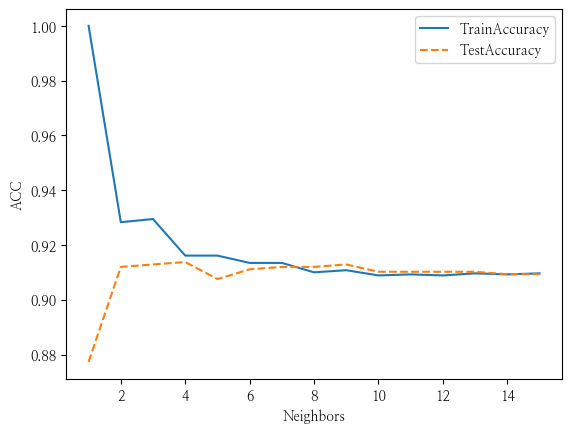

In [26]:
# 그래프
plt.plot(para_n, train_acc, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_n, test_acc, linestyle = "--", label = "TestAccuracy")
plt.ylabel("ACC")
plt.xlabel("Neighbors")
plt.legend()

### 가중치별 이웃 수 증가에 따른 변화

In [34]:
train_acc = []
test_acc = []

para_n = [n for n in range(1,11)] * 2
para_w = (["uniform"]*10 + (["distance"]*10))

for [v_para_n, v_para_w] in zip(para_n, para_w):
    knn_w = KNeighborsClassifier(n_neighbors = v_para_n, weights = v_para_w)
    knn_w.fit(df_train_x, df_train_y)
    train_acc.append(knn_w.score(df_train_x, df_train_y))
    test_acc.append(knn_w.score(df_train_x, df_train_y))

# 결과 저장
df_acc_w = pd.DataFrame()
df_acc_w["Neighbors"] = para_n
df_acc_w["Weights"] = para_w
df_acc_w["TrainScore"] = train_acc
df_acc_w["TestScore"] = test_acc

In [35]:
df_acc_w.round(3)

,Neighbors,Weights,TrainScore,TestScore
0,1,uniform,1.000,1.000
1,2,uniform,0.928,0.928
2,3,uniform,0.929,0.929
3,4,uniform,0.916,0.916
4,5,uniform,0.916,0.916
5,6,uniform,0.913,0.913
6,7,uniform,0.913,0.913
7,8,uniform,0.910,0.910
8,9,uniform,0.911,0.911
9,10,uniform,0.909,0.909


In [36]:
# Data Pivot
df_acc_w_pivot = df_acc_w.pivot(index="Neighbors", columns='Weights', values = ["TrainScore","TestScore"])
df_acc_w_pivot

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000       1.0  1.000000
2                1.0  0.928326       1.0  0.928326
3                1.0  0.929470       1.0  0.929470
4                1.0  0.916127       1.0  0.916127
5                1.0  0.916127       1.0  0.916127
6                1.0  0.913458       1.0  0.913458
7                1.0  0.913458       1.0  0.913458
8                1.0  0.910027       1.0  0.910027
9                1.0  0.910789       1.0  0.910789
10               1.0  0.908883       1.0  0.908883

In [37]:
# 그래프 
level0 = df_acc_w_pivot.columns.get_level_values(0)
level1 = df_acc_w_pivot.columns.get_level_values(1)
df_acc_w_pivot.columns = level0 + "_" + level1
df_acc_w_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,1.0,1.000000
2,1.0,0.928326,1.0,0.928326
3,1.0,0.929470,1.0,0.929470
4,1.0,0.916127,1.0,0.916127
5,1.0,0.916127,1.0,0.916127


<AxesSubplot:xlabel='Neighbors'>

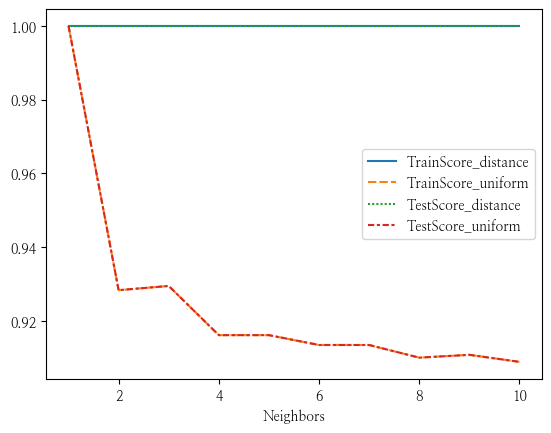

In [38]:
sns.lineplot(data = df_acc_w_pivot)

### 거리계산 방법 별 이웃 수 증가

In [18]:
train_acc = []
test_acc = []

para_n = [n for n in range(1,11)] * 2
para_metric = (["euclidean"]*10 + (["manhattan"]*10))

for [v_para_n, v_metric] in zip(para_n, para_metric):
    knn_w = KNeighborsClassifier(n_neighbors = v_para_n, metric = v_metric, weights = "uniform")
    knn_w.fit(df_train_x, df_train_y)
    train_acc.append(knn_w.score(df_train_x, df_train_y))
    test_acc.append(knn_w.score(df_train_x, df_train_y))

# 결과 저장
df_acc_m = pd.DataFrame()
df_acc_m["Neighbors"] = para_n
df_acc_m["Metric"] = para_metric
df_acc_m["TrainScore"] = train_acc
df_acc_m["TestScore"] = test_acc

<AxesSubplot:xlabel='Neighbors'>

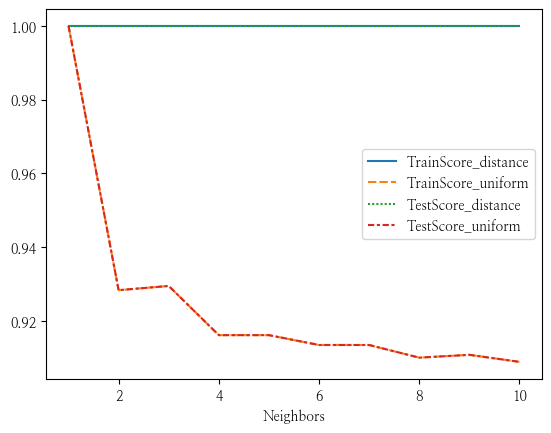

In [19]:
df_acc_m.round(3)
# Data Pivot
df_acc_m_pivot = df_acc_m.pivot(index="Neighbors", columns="Metric", values = ["TrainScore","TestScore"])
level0 = df_acc_m_pivot.columns.get_level_values(0)
level1 = df_acc_m_pivot.columns.get_level_values(1)
df_acc_m_pivot.columns = level0 + "_" + level1
df_acc_m_pivot.head()
sns.lineplot(data = df_acc_w_pivot)

## 최종 모델

In [20]:
knn_final = KNeighborsClassifier(n_neighbors = 4, metric = "euclidean", weights = "uniform")
knn_final.fit(df_train_x, df_train_y)
y_pred = knn_final.predict(df_test_x)
# ACC
print("Accuracy on train set : {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_final.score(df_test_x, df_test_y)))

Accuracy on train set : 0.916
Accuracy on test set : 0.914


In [21]:
# confusion matrix
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion matrix : 
[[1018    3]
 [  94   10]]


In [22]:
# 목표변수의 빈도 불균형 : f1 score
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.915     0.997     0.955      1021
           1      0.769     0.096     0.171       104

    accuracy                          0.914      1125
   macro avg      0.842     0.547     0.563      1125
weighted avg      0.902     0.914     0.882      1125

